# Final homework

## References

* [smth](https://pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/)

## Load the image

First, load the image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils

In [2]:
image_path = 'images/2003889393001.jpg'
image = cv2.imread(image_path)

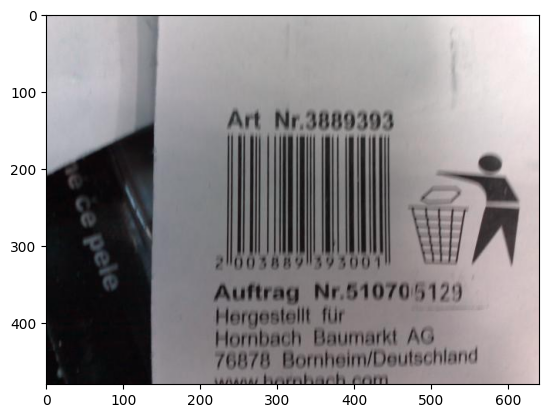

In [3]:
plt.imshow(image)

## Pre-process the image

* Convert image to grayscale. 

* Compute the Scharr gradient magnitude representation of the images in both the x and y direction. 

* Subtract the y-gradient from the x-gradient.

* Blur an image using a 9 x 9 kernel and then threshold the image.

* Construct a closing rectangular kernel and apply it to the thresholded image.

* Perform a series of erosions and dilations to remove blobs.

In [4]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [5]:
ddepth = cv2.cv.CV_32F if imutils.is_cv2() else cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)

In [6]:
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

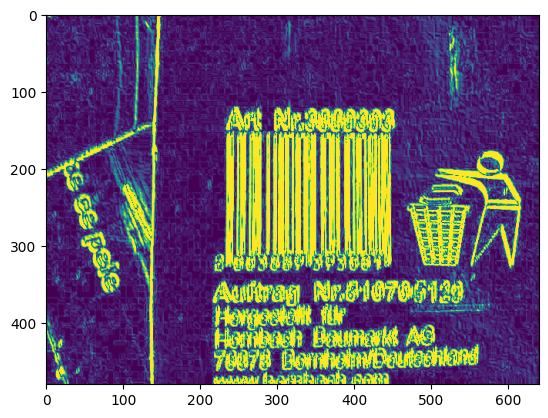

In [7]:
plt.imshow(gradient)

In [8]:
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

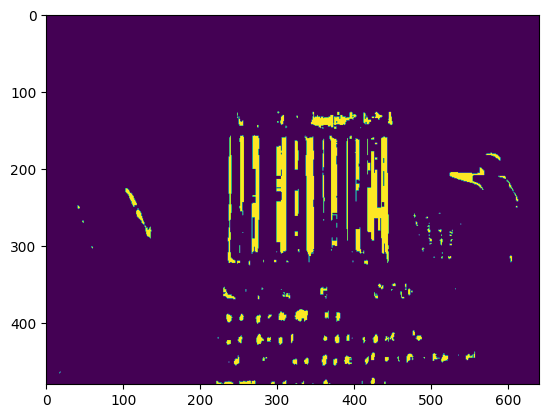

In [9]:
plt.imshow(thresh)

In [10]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 10))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

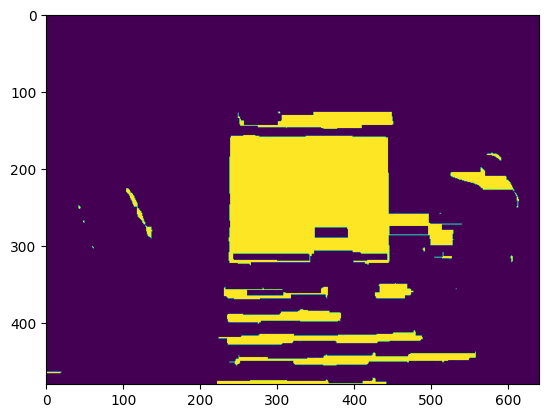

In [11]:
plt.imshow(closed)

In [12]:
closed = cv2.erode(closed, None, iterations = 2)
closed = cv2.dilate(closed, None, iterations = 2)

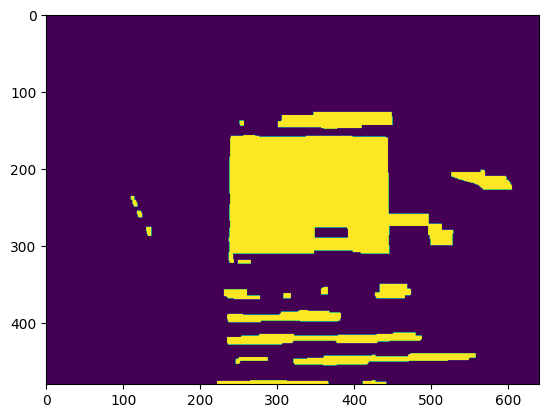

In [13]:
plt.imshow(closed)

## Find the barcode

* Find the contours in the thresholded image.

* Sort the contours by their area, keeping only the largest one.

* Compute the rotated bounding box of the largest contour.

* Draw a bounding box arounded the detected barcode and display the image.

In [14]:
cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]

In [15]:
rect = cv2.minAreaRect(c)
box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
box = np.int0(box)

/tmp/ipykernel_31192/478297875.py:3: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


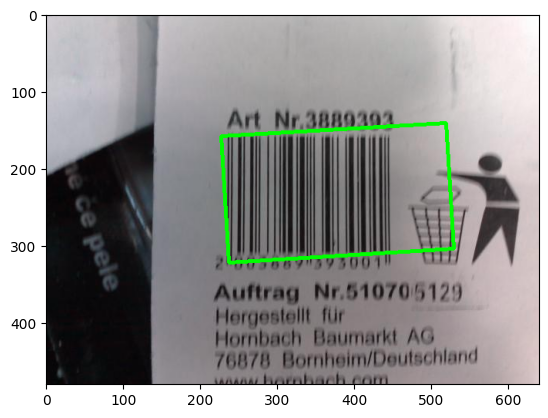

In [16]:
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
plt.imshow(image)

## Decode the barcode

## Output the result